## importamos librerias

In [32]:
 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importamos datos del csv para datos de 1871 a 2011

In [3]:

SP= pd.read_csv("data_csv.csv")
SP.corr(method ='pearson')
SP = SP.rename(columns={'PE10': 'PE ratio'})


## Matriz Correlacion 1871-2021

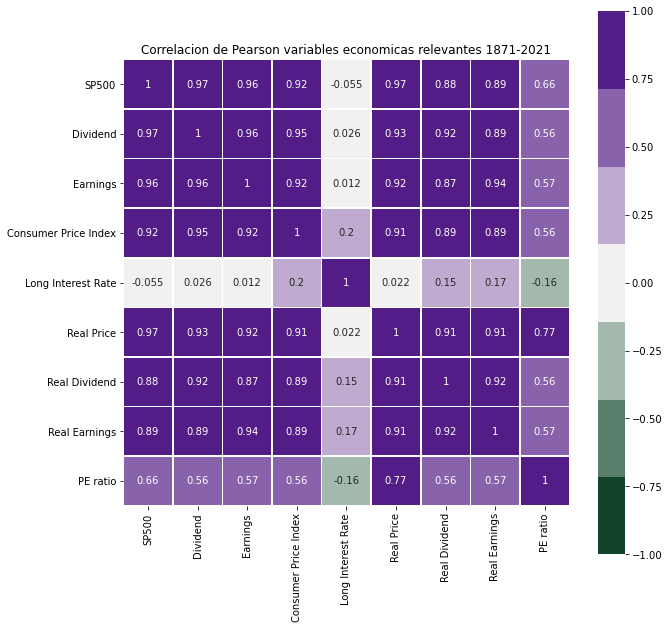

In [4]:

plt.figure(figsize=(10,10))
plt.title("Correlacion de Pearson variables economicas relevantes 1871-2021");
corr1871=sns.heatmap(SP.corr(method ='pearson'),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);
#Guardamos la imagen
#corr1871.figure.savefig("Correlacion 1871-2021")

In [5]:
#plt.plot(SP["SP500"],SP["Consumer Price Index"], ".", color='black');

In [6]:
#SP.to_excel("SP500.xlsx")

## Importación Nuevos datos: Brent, Gold, Inmobiliario

In [7]:
brent=pd.read_excel("brent_mensual.xlsx")
gold=pd.read_csv("monthlygold.csv")
inmobiliario=pd.read_csv("house_price_index.csv")

In [8]:
gold=pd.read_excel("oro_mensual.xlsx")

inflacion= pd.read_excel("inflation.xlsx")
inmobiliario=pd.read_csv("house_price_index.csv")
inmobiliario=inmobiliario.rename(columns={"CSUSHPINSA": "housing index", "DATE":"Date"})
inmobiliario
brent=brent.rename(columns={"Price": "Brent Price"})

## Lectura nuevos datos

In [9]:
#SP500tratado.dtypes

In [33]:
SP500tratado= pd.read_excel("SP500_datos_completos1.xlsx")
SP500tratado=SP500tratado.merge(brent)
SP500tratado=SP500tratado.merge(gold)
SP500tratado=SP500tratado.merge(inflacion)
SP500tratado=SP500tratado.merge(inmobiliario)
SP500tratado["Inflation rate"] =SP500tratado["Inflation rate"]*100
SP500tratado
#mergeamos todos los datos nuevos y creamos alguna columna de interes

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE ratio,Brent Price,Gold Price,Inflation parameter,Inflation rate,housing index
0,1987-01-01,264.500000,8.300000,14.686700,111.200,7.08,644.125885,20.212646,35.765912,14.922208,18.58,408.524,129.3572,1.46,63.737
1,1987-02-01,280.900000,8.320000,14.893300,111.600,7.25,681.612282,20.188730,36.139040,15.822318,18.86,401.045,129.3782,2.10,64.137
2,1987-03-01,292.500000,8.340000,15.100000,112.100,7.25,706.594285,20.146996,36.477175,16.433344,19.86,408.848,129.4085,3.03,64.472
3,1987-04-01,289.300000,8.400000,14.873300,112.700,8.02,695.143363,20.183907,35.738250,16.196534,18.98,439.665,129.4463,3.78,64.977
4,1987-05-01,289.100000,8.460000,14.646700,113.100,8.61,692.205984,20.256183,35.069296,16.160312,18.31,461.650,129.4849,3.86,65.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2020-11-01,3548.992500,58.469231,95.493333,260.229,0.87,3693.169596,60.844531,99.372731,32.473204,NaN,1866.300,139.8062,1.17,232.424
407,2020-12-01,3695.310000,58.278846,94.130000,260.474,0.93,3841.814229,60.589369,97.861877,33.765591,NaN,1858.420,139.8198,1.36,234.472
408,2021-01-01,3793.748421,58.063693,105.486667,261.582,1.08,3927.448822,60.109991,109.204259,34.512432,NaN,1866.980,139.8338,1.40,236.441
409,2021-02-01,3883.432105,57.848540,116.843333,263.014,1.26,3998.404369,59.561195,120.302578,35.103907,NaN,1808.170,139.8506,1.68,239.192


## Tratamiento datos con la base definitiva

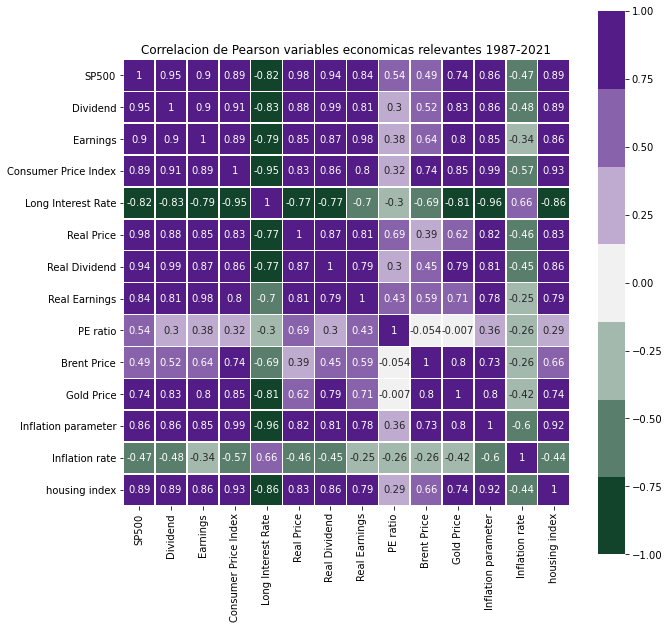

In [11]:
#Heatmap 1987-2021
plt.figure(figsize=(10,10))
plt.title("Correlacion de Pearson variables economicas relevantes 1987-2021");
corr1871=sns.heatmap(SP500tratado.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

corr1871.figure.savefig("Correlacion 1987-2021")

In [12]:
SP500tratado['Date'] =  pd.to_datetime(SP500tratado['Date'])
SP500tratado['year'] = SP500tratado['Date'].dt.isocalendar().year
#SP500tratado['grupo anual'] = np.array(np.floor(np.array((SP500tratado['year'])-1987) / 5.))
anyos = [1986, 1991, 1996, 2001, 2006, 2011, 2016, 2021]

#agrupamos en periodos quinquenales
SP500tratado['grupo anual'] = pd.cut(np.array(SP500tratado['year']), 
                                               bins=anyos)
#replica=SP500tratado['year'] 

#SP500tratado=SP500tratado[SP500tratado["year"]>1945]

SP500tratado

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE ratio,Brent Price,Gold Price,Inflation parameter,Inflation rate,housing index,year,grupo anual
0,1987-01-01,264.500000,8.300000,14.686700,111.200,7.08,644.125885,20.212646,35.765912,14.922208,18.58,408.524,129.3572,1.46,63.737,1987,"(1986, 1991]"
1,1987-02-01,280.900000,8.320000,14.893300,111.600,7.25,681.612282,20.188730,36.139040,15.822318,18.86,401.045,129.3782,2.10,64.137,1987,"(1986, 1991]"
2,1987-03-01,292.500000,8.340000,15.100000,112.100,7.25,706.594285,20.146996,36.477175,16.433344,19.86,408.848,129.4085,3.03,64.472,1987,"(1986, 1991]"
3,1987-04-01,289.300000,8.400000,14.873300,112.700,8.02,695.143363,20.183907,35.738250,16.196534,18.98,439.665,129.4463,3.78,64.977,1987,"(1986, 1991]"
4,1987-05-01,289.100000,8.460000,14.646700,113.100,8.61,692.205984,20.256183,35.069296,16.160312,18.31,461.650,129.4849,3.86,65.552,1987,"(1986, 1991]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2020-11-01,3548.992500,58.469231,95.493333,260.229,0.87,3693.169596,60.844531,99.372731,32.473204,NaN,1866.300,139.8062,1.17,232.424,2020,"(2016, 2021]"
407,2020-12-01,3695.310000,58.278846,94.130000,260.474,0.93,3841.814229,60.589369,97.861877,33.765591,NaN,1858.420,139.8198,1.36,234.472,2020,"(2016, 2021]"
408,2021-01-01,3793.748421,58.063693,105.486667,261.582,1.08,3927.448822,60.109991,109.204259,34.512432,NaN,1866.980,139.8338,1.40,236.441,2020,"(2016, 2021]"
409,2021-02-01,3883.432105,57.848540,116.843333,263.014,1.26,3998.404369,59.561195,120.302578,35.103907,NaN,1808.170,139.8506,1.68,239.192,2021,"(2016, 2021]"


## Graficos iniciales para describir variables

C:\Users\jsuar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


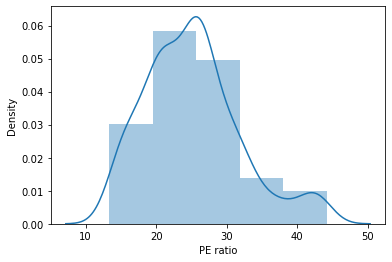

In [13]:
sns.distplot(SP500tratado['PE ratio'], hist=True, bins=5);
#tal vez hacer alguno más 

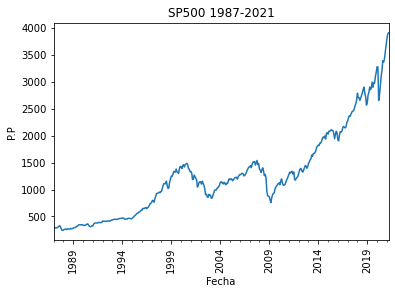

In [14]:
##estoy intentando hacer lo mismo que dani con el ejemplo de google con el .plot pero a mi no me sale
Copia_SP=SP500tratado.copy()
#Copia_SP=Copia_SP[Copia_SP["year"]>1945]
Copia_SP.set_index('Date', inplace=True)

Copia_SP1=Copia_SP["SP500"]

SP50019872021=Copia_SP1.plot(xlabel="Fecha", ylabel="P.P")


plt.xticks(rotation=90)
plt.title("SP500 1987-2021");
#SP50019462021.figure.savefig("SP500 1987-2021")

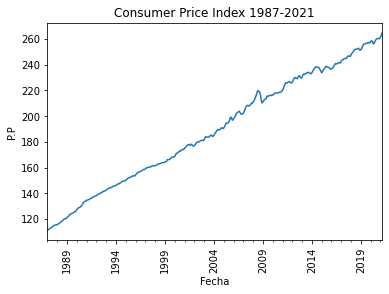

In [15]:
Copia_SP2=Copia_SP["Consumer Price Index"];
#Copia_SP2=Copia_SP2[Copia_SP["year"]>1945]
CPI19872021=Copia_SP2.plot(xlabel="Fecha", ylabel="P.P");
plt.xticks(rotation=90)
plt.title("Consumer Price Index 1987-2021");
#CPI19872021.figure.savefig("CPI 1987-2021")

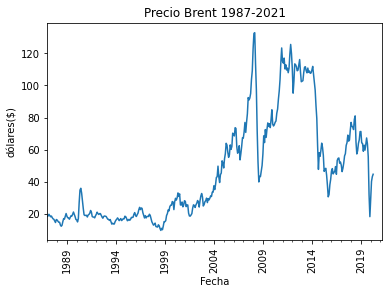

In [16]:
Copia_SP3=Copia_SP["Brent Price"];
#Copia_SP3=Copia_SP[Copia_SP["year"]>1987]
Brent19872021=Copia_SP3.plot(xlabel="Fecha", ylabel="dólares($)");
plt.xticks(rotation=90)
plt.title("Precio Brent 1987-2021");
#Brent19872021.figure.savefig("Brent 1987-2021")

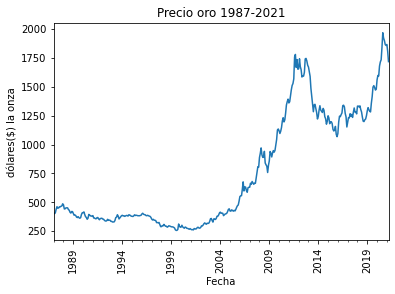

In [17]:
Copia_SP4=Copia_SP["Gold Price"];
#Copia_SP=Copia_SP[Copia_SP["year"]>1987]
Oro19872021=Copia_SP4.plot(xlabel="Fecha", ylabel="dólares($) la onza");
plt.xticks(rotation=90)
plt.title("Precio oro 1987-2021");
#Oro19872021.figure.savefig("Gold 1987-2021")

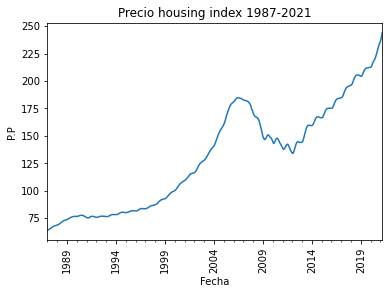

In [18]:
Copia_SP5=Copia_SP["housing index"];
#Copia_SP=Copia_SP[Copia_SP["year"]>1987]
house19872021=Copia_SP5.plot(xlabel="Fecha", ylabel="P.P");
plt.xticks(rotation=90)
plt.title("Precio housing index 1987-2021");
#house19872021.figure.savefig("housing index 1987-2021")

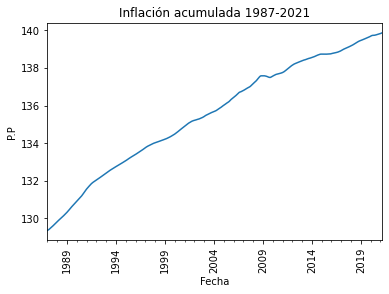

In [19]:
Copia_SP6=Copia_SP["Inflation parameter"];
#Copia_SP=Copia_SP[Copia_SP["year"]>1987]
inflation19872021=Copia_SP6.plot(xlabel="Fecha", ylabel="P.P");
plt.xticks(rotation=90)
plt.title("Inflación acumulada 1987-2021");
#inflation19872021.figure.savefig("inflación acumulada 1987-2021")

## Graficos de correlación SP 500 con distintas variables y otros gráficos de interes

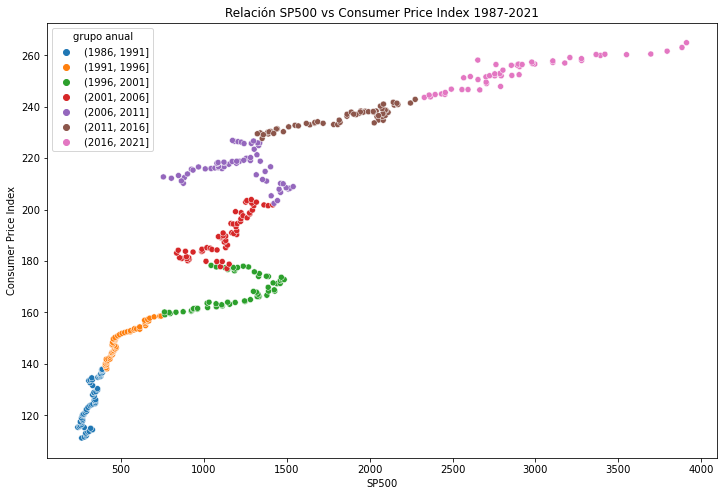

In [20]:
plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs Consumer Price Index 1987-2021');
CPISP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado['Consumer Price Index'],
               hue= SP500tratado['grupo anual']
               );
#CPISP500scatter.figure.savefig("Consumer Price Index vs SP500 1987-2021")

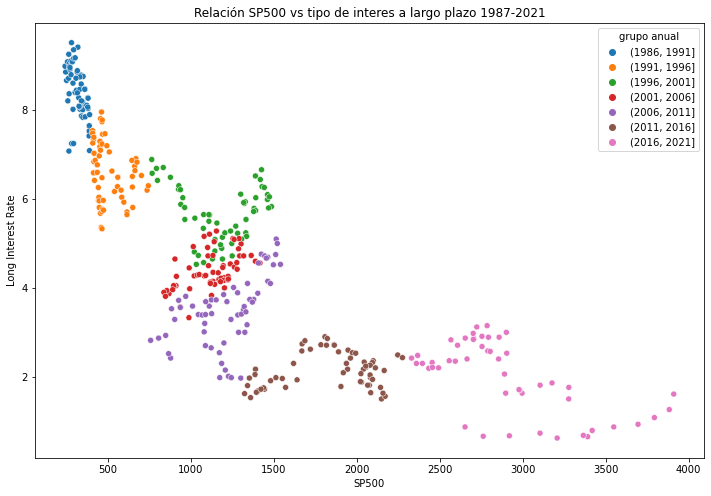

In [21]:
plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs tipo de interes a largo plazo 1987-2021');
ltirSP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado['Long Interest Rate'],
               hue= SP500tratado['grupo anual']
               );
#ltirSP500scatter.figure.savefig("Long Interest rate vs SP500 1987-2021")

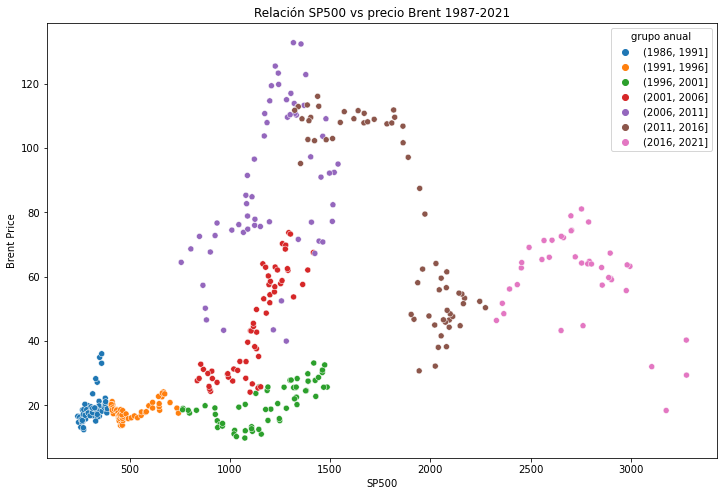

In [22]:
plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs precio Brent 1987-2021');
brentSP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado['Brent Price'],
               hue= SP500tratado['grupo anual']
               );
#SP500tratado
#brentSP500scatter.figure.savefig("Brent Price vs SP500 1987-2021")

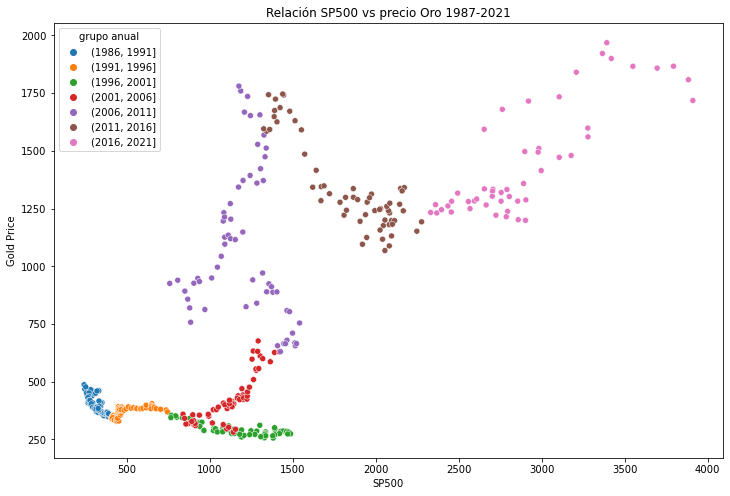

In [23]:
plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs precio Oro 1987-2021');
goldSP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado['Gold Price'],
               hue= SP500tratado['grupo anual']
               );

#goldSP500scatter.figure.savefig("Gold Price vs SP500 1987-2021")

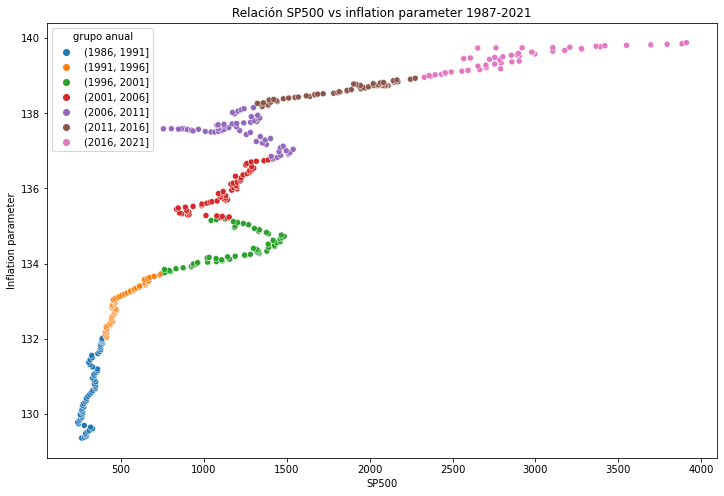

In [24]:

plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs inflation parameter 1987-2021');
infSP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado["Inflation parameter"],
               hue= SP500tratado['grupo anual']
               );

#infSP500scatter.figure.savefig("Inflation parameter vs SP500 1987-2021")

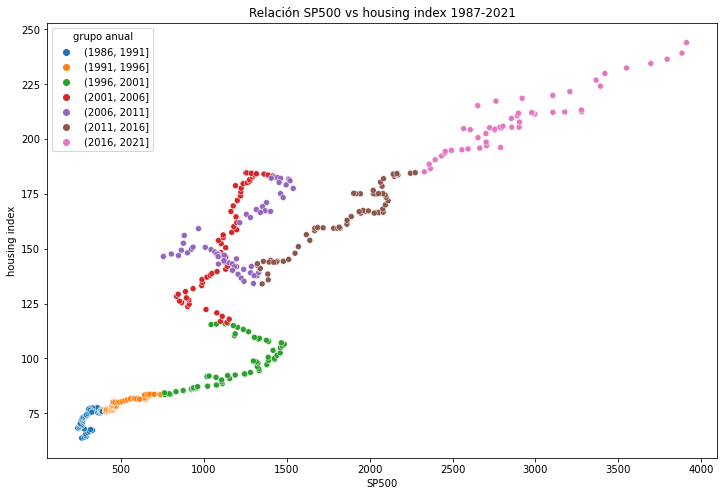

In [25]:

plt.figure(figsize=(12,8))
plt.title('Relación SP500 vs housing index 1987-2021');
houseSP500scatter=sns.scatterplot(x = SP500tratado['SP500'],
               y = SP500tratado["housing index"],
               hue= SP500tratado['grupo anual']
               );

#houseSP500scatter.figure.savefig("housing index vs SP500 1987-2021")

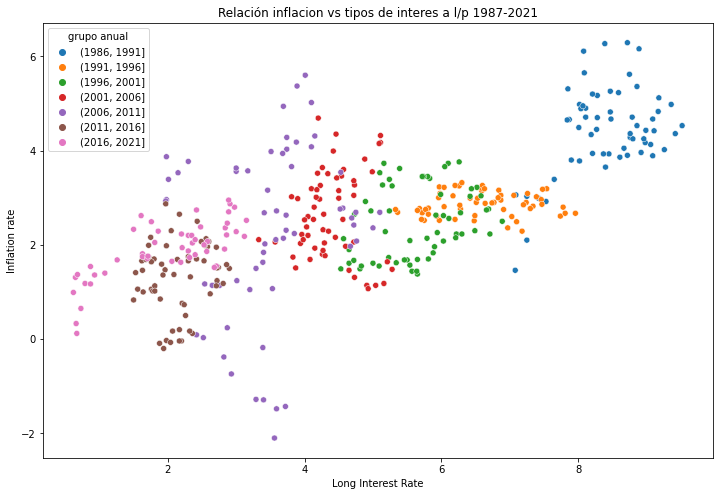

In [26]:
plt.figure(figsize=(12,8))
plt.title('Relación inflacion vs tipos de interes a l/p 1987-2021');
inftiscatter=sns.scatterplot(x =SP500tratado["Long Interest Rate"] ,
               y = SP500tratado['Inflation rate'],
               hue= SP500tratado['grupo anual']
               );

#inftiscatter.figure.savefig("inflation rate vs interes rate 1987-2021")

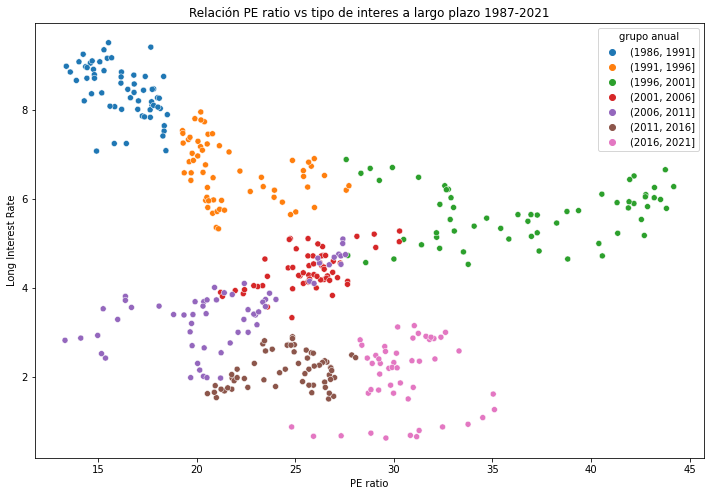

In [27]:
plt.figure(figsize=(12,8))
plt.title('Relación PE ratio vs tipo de interes a largo plazo 1987-2021');
ltirPEscatter=sns.scatterplot(x = SP500tratado['PE ratio'],
               y = SP500tratado['Long Interest Rate'],
               hue= SP500tratado['grupo anual']
               );
#ltirPEscatter.figure.savefig("Long Interest rate vs PE ratio 1987-2021")

In [28]:
agregar=SP500tratado["grupo anual"]
#SP500tratado.to_excel("SP500paraBI.xlsx")


0      (1986, 1991]
1      (1986, 1991]
2      (1986, 1991]
3      (1986, 1991]
4      (1986, 1991]
           ...     
406    (2016, 2021]
407    (2016, 2021]
408    (2016, 2021]
409    (2016, 2021]
410    (2016, 2021]
Name: grupo anual, Length: 411, dtype: category
Categories (7, interval[int64]): [(1986, 1991] < (1991, 1996] < (1996, 2001] < (2001, 2006] < (2006, 2011] < (2011, 2016] < (2016, 2021]]

## Datos tratados agrupados anualmente

In [145]:
SP500tratadoanyo=SP500tratado.groupby("year").mean()
#anyos1 = [1986, 1991, 1996, 2001, 2006, 2011, 2016, 2021]
#SP500tratadoanyo['grupo anual'] = pd.cut(np.array(SP500tratadoanyo['year']), 
#                                              bins=anyos)

#agregar= ["(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]", "(1986, 1991]"]

SP500tratadoanyo['grupo anual'] = np.array(np.floor(np.array((SP500tratadoanyo.index)-1987) / 5.))
SP500tratadoanyo["grupo anual"].replace({0.0: "(1986,1991]", 1.0: "(1991,1996]", 2.0: '(1996,2001]', 3.0: '(2001,2006]', 4.0: "(2006,2011]", 5.0: "(2011,2016]", 6.0: '(2016,2021]'}, inplace=True)
#SP500tratadoanyo.to_excel("SP500anualparaBI.xlsx")
SP500tratadoanyo

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE ratio,Brent Price,Gold Price,Inflation parameter,Inflation rate,housing index,grupo anual
year,,,,,,,,,,,,,,,
1987,284.046154,8.562821,15.652562,113.784615,8.406154,676.291065,20.376904,37.230541,15.852059,17.561538,449.168692,129.572492,3.691538,66.438692,"(1986,1991]"
1988,268.691667,9.347222,21.689725,118.708333,8.880833,612.858850,21.318089,49.429786,14.539060,15.914167,431.012833,130.083617,4.127500,71.560250,"(1986,1991]"
1989,326.236364,10.457879,24.270909,124.227273,8.444545,710.762249,22.790997,52.929381,16.752395,18.488182,379.583273,130.614445,4.844545,75.681091,"(1986,1991]"
1990,334.587500,11.642500,21.632500,130.658333,8.550000,694.016527,24.126976,44.854443,16.456913,24.118333,383.697000,131.185450,5.391667,76.939083,"(1986,1991]"
1991,376.177500,12.178333,18.960833,136.191667,7.858333,747.832916,24.215981,37.732180,17.919848,19.293333,362.259667,131.805017,4.250833,75.926417,"(1986,1991]"
1992,417.243077,12.344869,17.488462,140.492308,6.978462,804.205380,23.796216,33.692254,19.688160,19.287692,342.591308,132.218115,3.046923,76.338231,"(1991,1996]"
1993,454.553333,12.525833,20.368058,144.758333,5.802500,850.262064,23.432667,38.094354,20.839831,15.500833,364.656500,132.599617,2.894167,77.569417,"(1991,1996]"
1994,459.684167,12.909725,26.491108,148.566667,7.249167,837.922902,23.530456,48.250622,20.379626,17.035833,383.365583,132.918000,2.629167,79.625500,"(1991,1996]"
1995,548.582727,13.450000,33.977273,152.572727,6.470909,973.303040,23.871133,60.299609,22.947277,17.587273,384.652727,133.239627,2.806364,81.084545,"(1991,1996]"


## Analisis regresivo anual


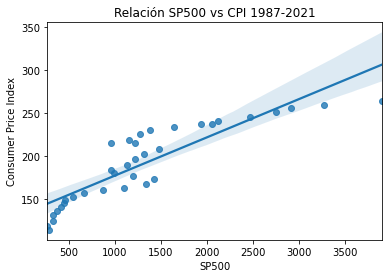

In [146]:

SPvsCPI=sns.regplot(x=SP500tratadoanyo["SP500"], y=SP500tratadoanyo["Consumer Price Index"]);
plt.title('Relación SP500 vs CPI 1987-2021');
#SPvsCPI.figure.savefig("Relación SP500 vs CPI 1987-2021")

In [147]:

#SP500tratado


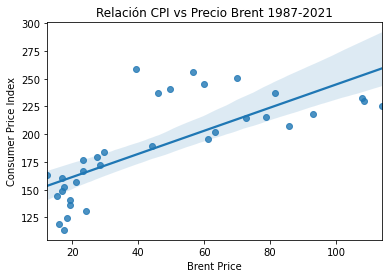

In [148]:

BrentvsCPI=sns.regplot(x=SP500tratadoanyo["Brent Price"], y=SP500tratadoanyo["Consumer Price Index"]);
plt.title('Relación CPI vs Precio Brent 1987-2021');
#BrentvsCPI.figure.savefig("Relación CPI vs Precio Brent 1987-2021")

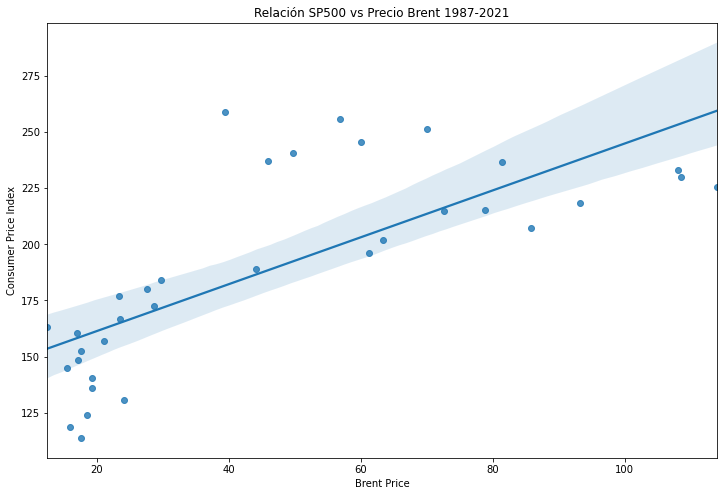

In [149]:
plt.figure(figsize=(12,8))
BrentvsSP=sns.regplot(x=SP500tratadoanyo["Brent Price"], y=SP500tratadoanyo["Consumer Price Index"]);
plt.title('Relación SP500 vs Precio Brent 1987-2021');
#BrentvsSP.figure.savefig("Relación SP500 vs Precio Brent 1987-2021")

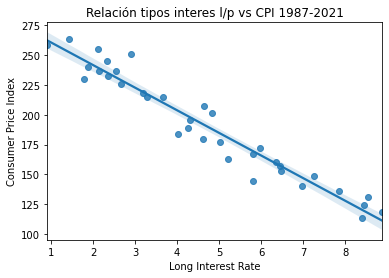

In [150]:
CPIvsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["Consumer Price Index"]);
plt.title('Relación tipos interes l/p vs CPI 1987-2021');
#CPIvsir.figure.savefig("RelacióntiCPI1987")

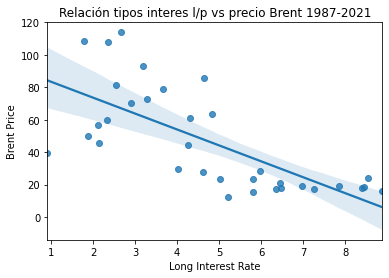

In [151]:
Brentvsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["Brent Price"]);
plt.title('Relación tipos interes l/p vs precio Brent 1987-2021');

#Brentvsir.figure.savefig("RelacióntiBrent1987")

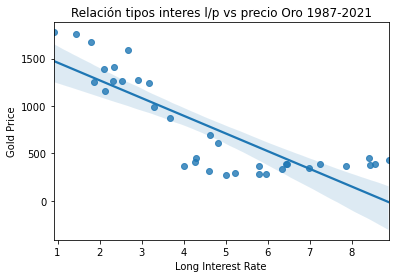

In [152]:
Goldvsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["Gold Price"]);
plt.title('Relación tipos interes l/p vs precio Oro 1987-2021');

#Goldvsir.figure.savefig("RelacióntiGold1987")

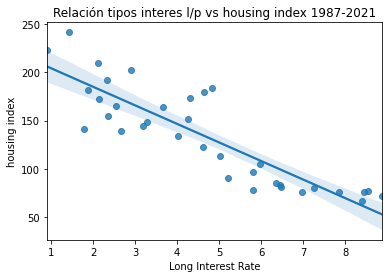

In [153]:
housevsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["housing index"]);
plt.title('Relación tipos interes l/p vs housing index 1987-2021');

#housevsir.figure.savefig("Relacióntihouse1987")

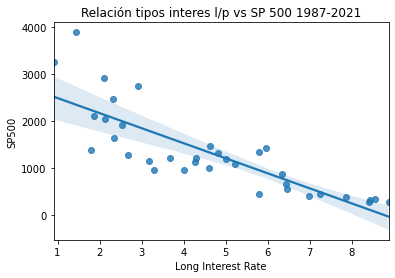

In [154]:
SPvsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["SP500"]);
plt.title('Relación tipos interes l/p vs SP 500 1987-2021');
#SPvsir.figure.savefig("RelacióntiSP1987")

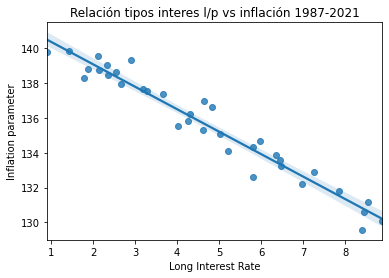

In [155]:
SPvsir=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["Inflation parameter"]);
plt.title('Relación tipos interes l/p vs inflación 1987-2021');
#SPvsir.figure.savefig("Relacióntiinfl1987")

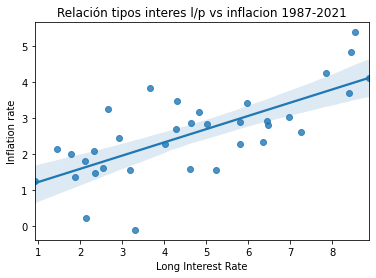

In [185]:
inflvsti=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["Inflation rate"]);
plt.title('Relación tipos interes l/p vs inflacion 1987-2021');
inflvsti.figure.savefig("Relacióntiinflacion%1987")

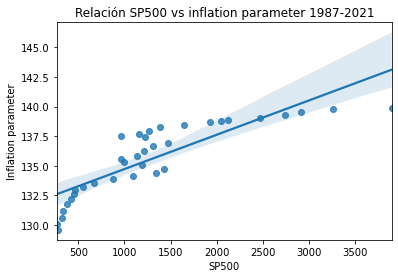

In [190]:
SPvsCPI=sns.regplot(x=SP500tratadoanyo["SP500"], y=SP500tratadoanyo["Inflation parameter"]);
plt.title('Relación SP500 vs inflation parameter 1987-2021');
SPvsCPI.figure.savefig("RelacióninfpSP1987")

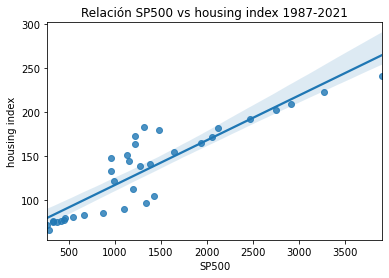

In [191]:
SPvshouse=sns.regplot(x=SP500tratadoanyo["SP500"], y=SP500tratadoanyo["housing index"]);
plt.title('Relación SP500 vs housing index 1987-2021');
SPvshouse.figure.savefig("RelaciónhouseSP1987")

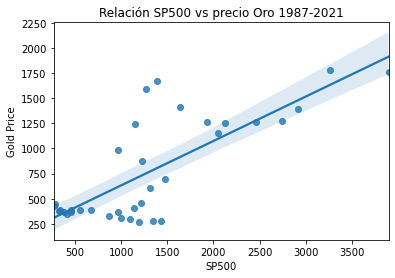

In [192]:
SPvsGold=sns.regplot(x=SP500tratadoanyo["SP500"], y=SP500tratadoanyo["Gold Price"]);
plt.title('Relación SP500 vs precio Oro 1987-2021');
SPvsGold.figure.savefig("RelaciónGoldSP1987")

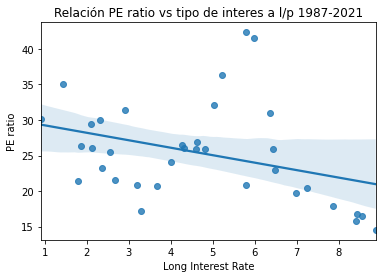

In [227]:
irvsPE=sns.regplot(x=SP500tratadoanyo["Long Interest Rate"], y=SP500tratadoanyo["PE ratio"]);
plt.title('Relación PE ratio vs tipo de interes a l/p 1987-2021');
irvsPE.figure.savefig("RelaciónirvsPE1987")

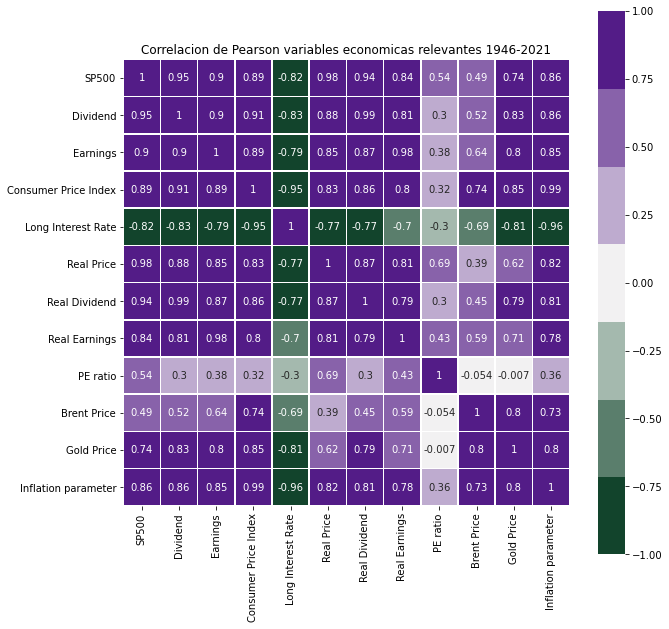

In [158]:
SP500tratadosin=SP500tratado[["Date","SP500", "Dividend", "Earnings","Consumer Price Index", 'Long Interest Rate','Real Price','Real Dividend','Real Earnings','PE ratio', "Brent Price", "Gold Price", 'Inflation parameter']]
plt.figure(figsize=(10,10))
corr19452021=sns.heatmap(SP500tratadosin.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);
plt.title("Correlacion de Pearson variables economicas relevantes 1946-2021");
#corr19452021.figure.savefig("Correlacio1946-2021")

C:\Users\jsuar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


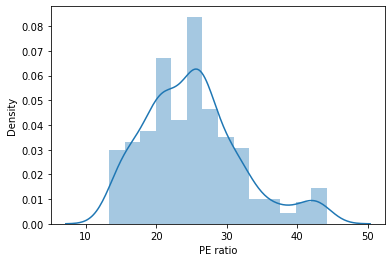

In [30]:
countPEratio = sns.distplot(SP500tratado["PE ratio"])